<a href="https://colab.research.google.com/github/SamMerc/MIT-Stellar-Contamination-Workshop---ANTARESS-demo/blob/main/ANTARESS_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIT Stellar Contamination Workshop
## Focus Session IV : Modeling Starspots and Active Surfaces

### `ANTARESS` with active regions demo
#### Links
- `ANTARESS` : [source](https://gitlab.unige.ch/spice_dune/antaress), [docs](https://www.astro.unige.ch/~bourriev/antaress/doc/html/)

# Pre-demo requirements

##Install `ANTARESS`

In [1]:
%%bash

apt-get update -qq
apt-get install -y libgsl-dev libcerf-dev
pip install "numpy<2.0" "scipy<1.13" --force-reinstall
pip install git+https://gitlab.unige.ch/spice_dune/antaress.git@active_region_branch

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  libcerf1 libgsl27 libgslcblas0
Suggested packages:
  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html
The following NEW packages will be installed:
  libcerf-dev libcerf1 libgsl-dev libgsl27 libgslcblas0
0 upgraded, 5 newly installed, 0 to remove and 45 not upgraded.
Need to get 2,381 kB of archives.
After this operation, 10.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcerf1 amd64 1.3-2.1 [26.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libcerf-dev amd64 1.3-2.1 [3,836 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libgslcblas0 amd64 2.7.1+dfsg-3 [94.4 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libgsl27 amd64 2.7.1+dfsg-3 [1,000 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libgsl-dev amd64 2.7.1+dfsg-3 [1,

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
  Running command git clone --filter=blob:none --quiet https://gitlab.unige.ch/spice_dune/antaress.git /tmp/pip-req-build-1scouk_x
  Running command git che

## Create background file

In [4]:
%%bash
wget -O ANTARESS_nbook_bground.py https://raw.githubusercontent.com/SamMerc/MIT-Stellar-Contamination-Workshop---ANTARESS-demo/main/ANTARESS_nbook_bground.py

--2025-08-23 22:57:03--  https://raw.githubusercontent.com/SamMerc/MIT-Stellar-Contamination-Workshop---ANTARESS-demo/main/ANTARESS_nbook_bground.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50059 (49K) [text/plain]
Saving to: ‘ANTARESS_nbook_bground.py’

     0K .......... .......... .......... .......... ........  100% 3.99M=0.01s

2025-08-23 22:57:03 (3.99 MB/s) - ‘ANTARESS_nbook_bground.py’ saved [50059/50059]



## Import libraries

In [5]:
import ANTARESS_nbook_bground
import os

ModuleNotFoundError: No module named 'numpy.rec'

# Introduction

This notebook allows you to run a simplified version of the ANTARESS workflow, for the following purpose:
- generating a mock CCF dataset of a planet transiting a star with active regions (spots or faculae), as observed with a given spectrograph

The main interest of including active regions in the construction of the mock dataset is to estimate the impact of various spot configurations on the extracted Rossiter-McLaughlin signature.

To exploit the workflow to its full capabilities, run its executable with the [configuration files](https://www.astro.unige.ch/~bourriev/antaress/doc/html/Fixed_files/getting_started.html).

In [ ]:
input_nbook = ANTARESS_nbook_bground.init()
input_nbook['type'] = 'mock'
if not os.path.isdir('./Ongoing/'):os.mkdir('./Ongoing')
input_nbook['working_path'] = './Ongoing'

# System parameters

**Parameters of the host star**

Run this cell to define the host star.
- `star_name` (string): Name of the star. Should not contain spaces/dashes.
- `Rs` (float): Radius of the star, in $R_\odot$.
- `sysvel` (float): Systemic radial velocity, in km/s.
- `vsini` (float): Projected stellar surface velocity, in km/s.
- `istar` (float): Stellar inclination, in degrees.
- `ld_u1` (float): First coefficient of the quadratic limb-darkening.
- `ld_u2` (float): Second coefficient of the quadratic limb-darkening.

In [ ]:
input_nbook['par'].update({
    'star_name' : 'Arda',
    'Rs'        : 0.9,
    'sysvel'    : 0.,
    'vsini'     : 15.,
    'istar'     : 90.,
    'ld_u1'     : 0.2,
    'ld_u2'     : 0.5,
})
ANTARESS_nbook_bground.init_star(input_nbook)

**Parameters of transiting planet**

Run this cell to set the transiting planet on which the RM analysis is applied.
- `planet_name` (string): Name of the transiting planet. Should not contain spaces/dashes.
- `period` (float): Orbital period, in days.
- `T0` (float): Mid-transit time, in ${\rm BJD}_{\rm TBD}$.
- `ecc` (float): Orbital eccentricity.
- `long_per` (float): Longitude of periastron, in degrees. If the orbit is circular, fill in `90.`.
- `Kstar` (float): RV semi-amplitude, in m/s.
- `aRs` (float): Scaled separation $a/R_\star$.
- `incl` (float): Orbital inclination, in degrees.
- `lambda` (float): Sky-projected spin-orbit angle, in degrees.
- `RpRs` (float): Planet-to-star radius ratio $R_{\rm p}/R_\star$.

In [ ]:
input_nbook['par'].update({
    'planet_name' : 'Valinor',
    'period'      : 3.8,
    'T0'          : 2457176.1,
    'ecc'         : 0.,
    'long_per'    : 90.,
    'Kstar'       : 38.1,
    'aRs'         : 12.0,
    'incl'        : 89.,
    'lambda'      : 50.,
    'RpRs'        : 0.25
})
ANTARESS_nbook_bground.init_pl(input_nbook,'main')

**Parameters of additional planets in the system**

Run this cell to set additional planets, which will only contribute to the computation of the star Keplerian motion.

The names and definitions of the parameters are the same as for the main planet (`aRs`, `incl`, `RpRs` are not required).

Copy the cell to add further planets

In [ ]:
input_nbook['par'].update({
    'planet_name' : 'Numenor',
    'period'      : 8.,
    'T0'          : 2457176.2,
    'ecc'         : 0.,
    'long_per'    : 90.,
    'Kstar'       : 20.
})
ANTARESS_nbook_bground.init_pl(input_nbook,'sec')

# Mock dataset properties

**Visit**

Run this cell to define the mock visit. It must overlap with the transit of the `transiting planet`.
- `instrument` (string): Instrument of the visit (e.g. `ESPRESSO`, `HARPS`...).
- `night` (string): Night of the visit. It is preferred to use the standard format, i.e. `YYYYMMDD`.
- `range` (list): Absolute time range of the visit, in BJD.
- `nexp` (int): Number of exposures in the visit.

In [ ]:
input_nbook['par'].update({
    'instrument' : 'ESPRESSO',
    'night'      : 'Night 1',
    'range'      : [2457176.1 -3./24.,2457176.1 + 3./24.],
    'nexp'       : 50,
})
ANTARESS_nbook_bground.add_vis(input_nbook,mock=True)

**Radial velocity table**

Run this cell to set the radial velocity table over which CCFs are defined (in km/s, in the star rest frame).
- `x_start` (float): start of the table.
- `x_end` (float): end of the table.
- `dx` (float): step of the table.

In [ ]:
input_nbook['par'].update({
    'x_start' : -80.,
    'x_end'   :  80.,
    'dx'      :  0.8
})
ANTARESS_nbook_bground.set_mock_rv(input_nbook)

**Parameters of the main active region**

Run this cell to define the main active region.
- `ar_name` (string): Name of the active region. Should not contain spaces/dashes.
- `lat` (float): Constant latitude of the active region, in degrees.
- `ang` (float): Half-angular size, in degrees.
- `Tc` (float): Time at which the active region is at longitude 0, in ${\rm BJD}_{\rm TBD}$.
- `fctrst` (float): Flux level of the active region surface, relative to the quiet surface of the star. 0 = no emission, < 1 = dimmer than the quiet surface (i.e. a spot), > 1 = brighter than the quiet surface (i.e. a facula)
- `ld_ar_u1` (float): First coefficient of the active region's quadratic limb-darkening.
- `ld_ar_u2` (float): Second coefficient of the active region's quadratic limb-darkening.

In [ ]:
input_nbook['par'].update({
    'ar_name'    : 'Laurelin',
    'lat'        : 20.,
    'ang'        : 15.,
    'Tc'         : 2457176.0,
    'fctrst'     : 0.5,
    'ld_ar_u1'   : 0.2,
    'ld_ar_u2'   : 0.5
})
ANTARESS_nbook_bground.init_ar(input_nbook,'main')

**Parameters of additional active regions**

Run this cell to set additional active regions.

The names and definitions of the parameters are the same as for the main active region (`ld_ar_u1` and `ld_ar
_u2` are not required as they are shared across active regions).

Copy this cell to add further active region.

In [ ]:
input_nbook['par'].update({
    'ar_name'    : 'Telperion',
    'lat'          : -10.,
    'ang'          : 20.,
    'Tc'           : 2457176.2,
})
ANTARESS_nbook_bground.init_ar(input_nbook,'sec')

**Stellar line**

Run this cell to set the absorption line used to tile the star.
- `gamma` (float): systemic rv (in km/s).
- `contrast` (float): intrinsic line constrast.
- `FWHM` (float): intrinsic line full-width at half-maximum (in km/s)
- `flux` (float): disk-integrated line continuum flux (number of counts received for an exposure time of 1 s).
- `noise` (bool): set to True to randomly draw white noise for each CCF pixel, based on its count level (to increase the S/N, increase `flux`).

Line is arbitrarily set to a Gaussian profile, centered in the star rest frame.

In [ ]:
input_nbook['par'].update({
    'gamma'      : 10.,
    'contrast'   : 0.7,
    'FWHM'       : 2.5,
    'flux'       : 800,
    'noise'      : True,
})
ANTARESS_nbook_bground.set_mock_prof(input_nbook)

# Processing and analysis for plot display.

Run this cell to set up the processing and analysis modules. This has no impact on the generation of the mock dataset, but it is required for its display.

In [ ]:
ANTARESS_nbook_bground.save_system(input_nbook)
ANTARESS_nbook_bground.ana_prof(input_nbook,'DI')
ANTARESS_nbook_bground.set_sysvel(input_nbook)
ANTARESS_nbook_bground.align_prof(input_nbook)
ANTARESS_nbook_bground.flux_sc(input_nbook)
ANTARESS_nbook_bground.DImast_weight(input_nbook)
ANTARESS_nbook_bground.extract_diff(input_nbook)

System and data stored in :  ./Ongoing/Arda/Valinor_Saved_data
Plots stored in :  ./Ongoing/Arda/Valinor_Plots


Run these cells to set up the plot display of your mock dataset (see at the end of the notebook).

In [ ]:
ANTARESS_nbook_bground.plot_system(input_nbook)
ANTARESS_nbook_bground.plot_prop(input_nbook,'DI')
ANTARESS_nbook_bground.plot_ar(input_nbook)

**Disk-integrated CCF series**

Uncomment `y_range` to adjust the flux range of the CCFs (vertical axis)

In [ ]:
# input_nbook['par']['y_range'] = [2.8e5,3.55e5]
ANTARESS_nbook_bground.plot_prof(input_nbook,'DI_prof')

**Differential stellar profiles**

Uncomment `y_range` and `v_range` to adjust the flux range of the CCFs (vertical axis in 1D, color scale in 2D)

In [ ]:
# input_nbook['par']['y_range'] = [0.5,1.2]
ANTARESS_nbook_bground.plot_prof(input_nbook,'Res_prof')
# input_nbook['par']['v_range'] = [0.6,1.1]
ANTARESS_nbook_bground.plot_map(input_nbook,'Res_prof')

# Running ANTARESS

Run this cell to launch the ANTARESS workflow.

The mock CCF profile series can then be retrieved under `working_path/Arda/Valinor_Saved_data/Processed_data/instrument_night_i.npz`

In [ ]:
from antaress.ANTARESS_launch.ANTARESS_launcher import ANTARESS_launcher
ANTARESS_launcher(working_path=input_nbook['working_path'], nbook_dic = input_nbook, exec_comm=False)

2025-08-23 22:20:07,159 - WARNING - File .dacerc not found. You are requesting data in public mode. To change this behaviour, create a .dacerc file in your home directory and fill it with your API key. More infos on https://dace.unige.ch


****************************************
Launching ANTARESS
****************************************

Multi-threading: 2 threads available
Running with artificial data
Covariances discounted
Weight contributors :
  On :(DI master) 
  Off :(Calibration) (Tellurics) 
Study of: Valinor
Accounting for Keplerian motion from all planets
Initializing planet Valinor
  Transiting object
  Automatic definition of T14[Valinor]=2.99 h
Initializing planet Numenor
Automatic activation of "gen_dic["theoPlOcc"]"
Default nsub_Dpl[Valinor]=124
Study of: Laurelin, Telperion
Active regions are simulated
Default nsub_Dar[Laurelin]=128
Default nsub_Dar[Telperion]=169

-----------------------
Processing instrument : ESPRESSO
-----------------------
  Reading and initializing CCFs
   > Data resampled on a common spectral table
         Calculating data
         Initializing visit "Night 1"
           Building exposures ... 
         Processing visit Night 1
           All exposures share a common spectral tab

# Plot display

In [ ]:
from IPython.display import Image
from IPython.core.display import HTML

Run the cells below to show saved plots.

**Planetary system architecture**

This plot shows the system along the line-of-sight, to scale. The star is colored as a function of its surface radial velocity field, and the planetary orbit displayed as a green line is controlled by the system values you defined. The spots are shown as grey grids, with their shade controlled by the contrast you defined. The spots' orbit is displayed with a lime green line. The black and green arrow are the sky-projected stellar spin and orbital normal. Many more options are available through the plotting configuration file.

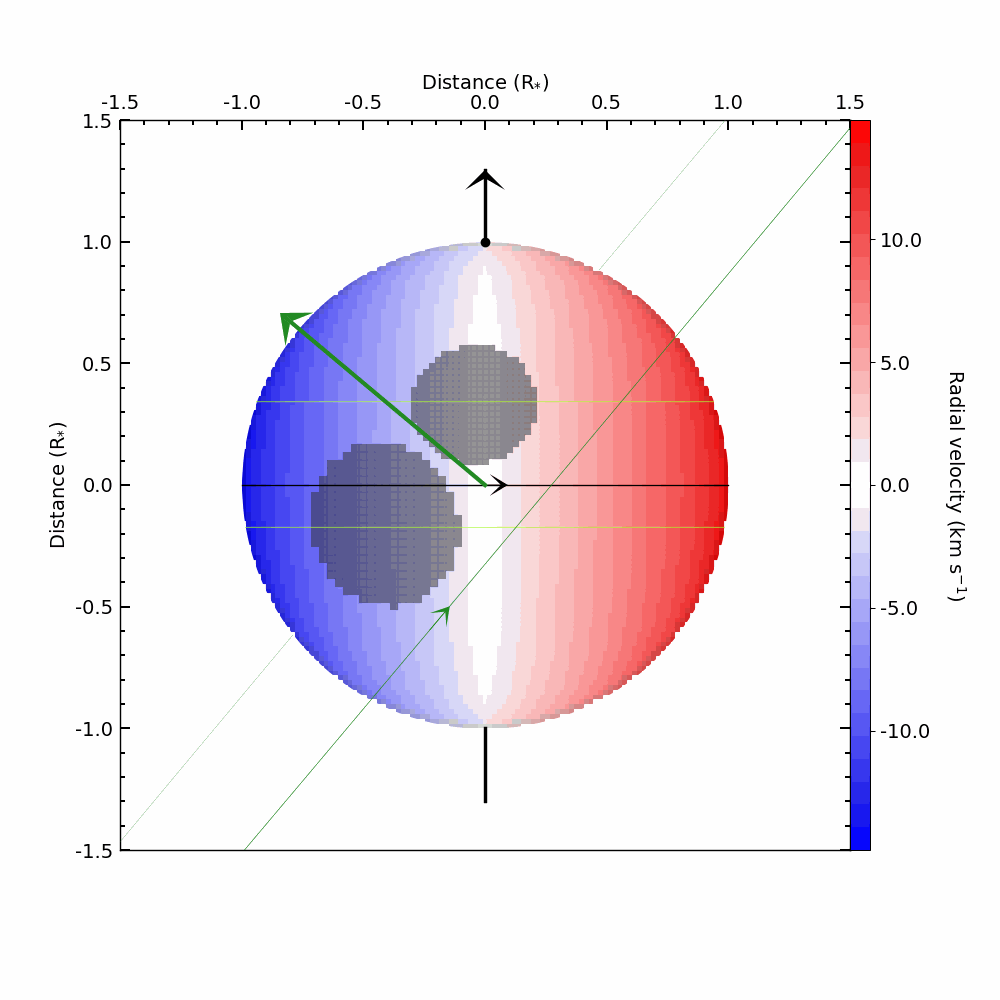

In [ ]:
Image(filename = input_nbook['plot_path']+'System_view/System.gif', width=800)

**Disk-integrated CCF series**

This plot shows the series of mock disk-integrated CCFs (blue profiles). Depending on the system properties you defined, you will see by eye the anomalous `bumps` induced by the occultation of local stellar lines by the planet and spots.

The dashed black profiles are best-fit Gaussian models to each CCF, as is usually used to derive RVs.

In [ ]:
Image(filename = input_nbook['plot_path']+'DI_data/'+input_nbook['par']['instrument']+'_'+input_nbook['par']['night']+'_Indiv/Data/CCF/phase.gif')

FileNotFoundError: [Errno 2] No such file or directory: './Ongoing/Arda/Valinor_Plots/DI_data/ESPRESSO_Night 1_Indiv/Data/CCF/phase.gif'

**Disk-integrated RV series**

This plot shows the RV series derived from the fits to the mock CCF series.

If only planets were present, we would expect the out-of-transit RVs (contacts shown as dashed black lines) to trace the Keplerian motion of your mock star with respect to the solar system barycenter (the Keplerian model is plotted as a blue curve), while the in-transit RVs would present the classical RM anomaly induced by the local occultation of stellar lines by the planet.

Spots induce additional distortions in the in- and out-of-transit disk-integrated CCFs, complicating the interpretation of fitted RV values. Indeed, it becomes challenging to use the 'Classical' RM technique, which relies on analyzing these disk-integrated RV series, for the extraction of planetary orbital architectures as the spot and planet contributions are intertwined.

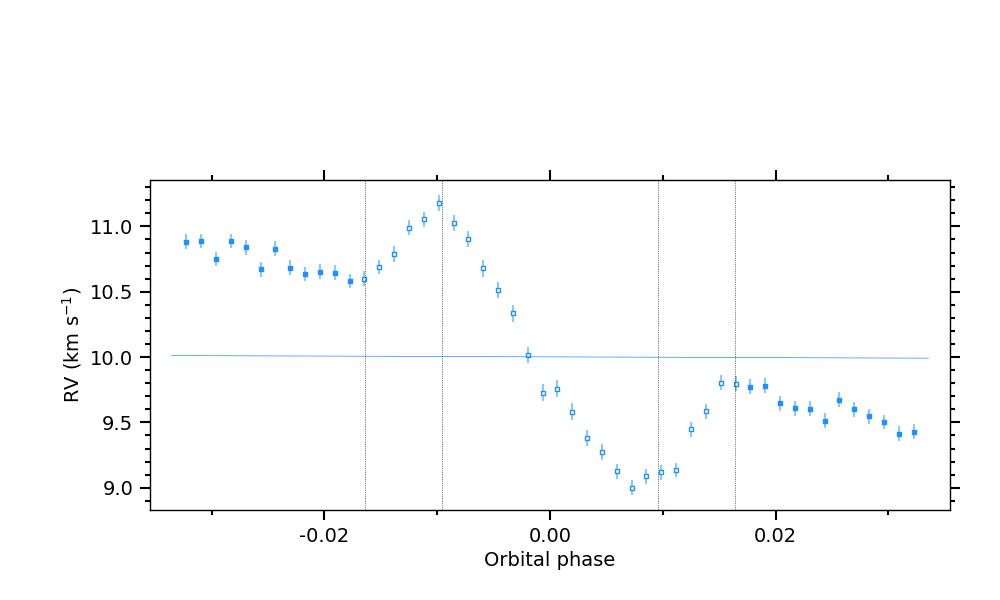

In [ ]:
Image(filename = input_nbook['plot_path']+'DI_prop/rv_phase.png')

**Differential CCF series**

These plots show the differential stellar lines, as they would be retrieved by applying the workflow to a real dataset. As spots are present, these CCFs no longer represent the stellar regions occulted by the planet.

The first plot shows the series of mock intrinsic CCFs (blue profiles) in the star rest frame. The second plot, commonly named differential map, shows the series in phase-RV space, colored with flux.

This example illustrates the impact of spots on the retrieval of planet-occulted stellar lines. Since spots are present in- and out-of-transit, they affect both the individual exposures and the master out-of-transit used to construct the differential CCFs.This dual impact leads to complex differential maps. With ANTARESS, you will be able to analyze such differential CCF series and extract the spot and planetary properties simultaneously.

In [ ]:
Image(filename = input_nbook['plot_path']+'Diff_data/'+input_nbook['par']['instrument']+'_'+input_nbook['par']['night']+'_Indiv/Data/CCF/phase.gif')

FileNotFoundError: [Errno 2] No such file or directory: './Ongoing/Arda/Valinor_Plots/Diff_data/ESPRESSO_Night 1_Indiv/Data/CCF/phase.gif'

In [ ]:
Image(filename = input_nbook['plot_path']+'Diff_data/'+input_nbook['par']['instrument']+'_'+input_nbook['par']['night']+'_Map/Data/CCF/iord0.png', width=800)

FileNotFoundError: [Errno 2] No such file or directory: './Ongoing/Arda/Valinor_Plots/Diff_data/ESPRESSO_Night 1_Map/Data/CCF/iord0.png'